# Boeing Co. Stock Regressions
### Milo Anderson 2019-03-12

In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import datetime as dt
import requests

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [24.0, 16.0]

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Load data into DataFrame, cast date to datetime64

In [3]:
API_URL = 'https://api.iextrading.com/1.0'
STOCK = 'BA'

res = requests.get(f'{API_URL}/stock/{STOCK}/chart/5y')
data = res.json()
df = pd.DataFrame(data)

df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))
df.head(5)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-1.0913,0.000000,-0.987,109.5039,2014-03-12,110.1815,"Mar 12, 14",108.9582,110.0055,5041992,5041992,109.6738
1,-2.2353,-0.020413,-2.041,107.2686,2014-03-13,110.5423,"Mar 13, 14",107.0398,109.6975,6071160,6071160,104.8453
2,1.0737,-0.010609,1.001,108.3422,2014-03-14,109.3719,"Mar 14, 14",107.3214,107.4710,5702757,5702757,109.7836
3,2.0329,0.007956,1.876,110.3751,2014-03-17,110.7271,"Mar 17, 14",109.0551,109.0991,4381634,4381634,110.2498
4,-1.2145,-0.003134,-1.100,109.1607,2014-03-18,110.7241,"Mar 18, 14",108.8262,110.5247,4151560,4151560,110.2358


#### DataFrame description

In [4]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.230061,0.764635,0.113311,193.234436,194.981717,191.282279,193.133482,4.046572e+06,4.046572e+06,193.192774
std,3.663528,0.867254,1.488082,94.967724,96.150229,93.622601,94.920984,2.300633e+06,2.300633e+06,94.934609
min,-23.453300,-0.082227,-8.929000,100.499700,101.797200,94.624000,97.422800,7.889570e+05,7.889570e+05,98.616900
25%,-1.102350,0.104862,-0.637000,120.986725,121.799325,119.881350,120.785225,2.810957e+06,2.810957e+06,120.769575
50%,0.180238,0.243072,0.122500,136.121200,137.189900,134.681000,135.931800,3.463870e+06,3.463870e+06,135.870650
75%,1.432025,1.479144,0.938500,271.475925,274.440125,269.055875,271.524725,4.635888e+06,4.635888e+06,272.019425
max,22.696000,3.023784,9.880000,440.620000,446.010000,440.190000,446.010000,3.474219e+07,3.474219e+07,442.594300


#### DataFrame info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df['date'], df['close'], test_size=0.5, random_state=43)

Text(0.5, 1.0, 'Training Set')

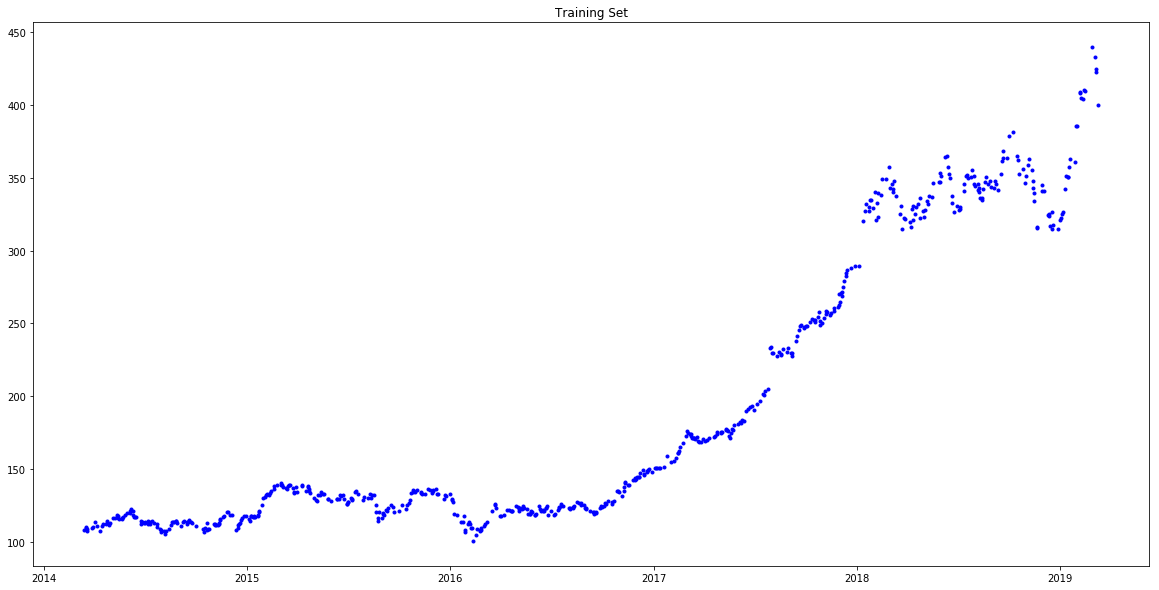

In [7]:
plt.figure(figsize=(20,10))
plt.plot(X_train, Y_train, 'bo', markersize=3)
plt.title('Training Set')

Text(0.5, 1.0, 'Testing Set')

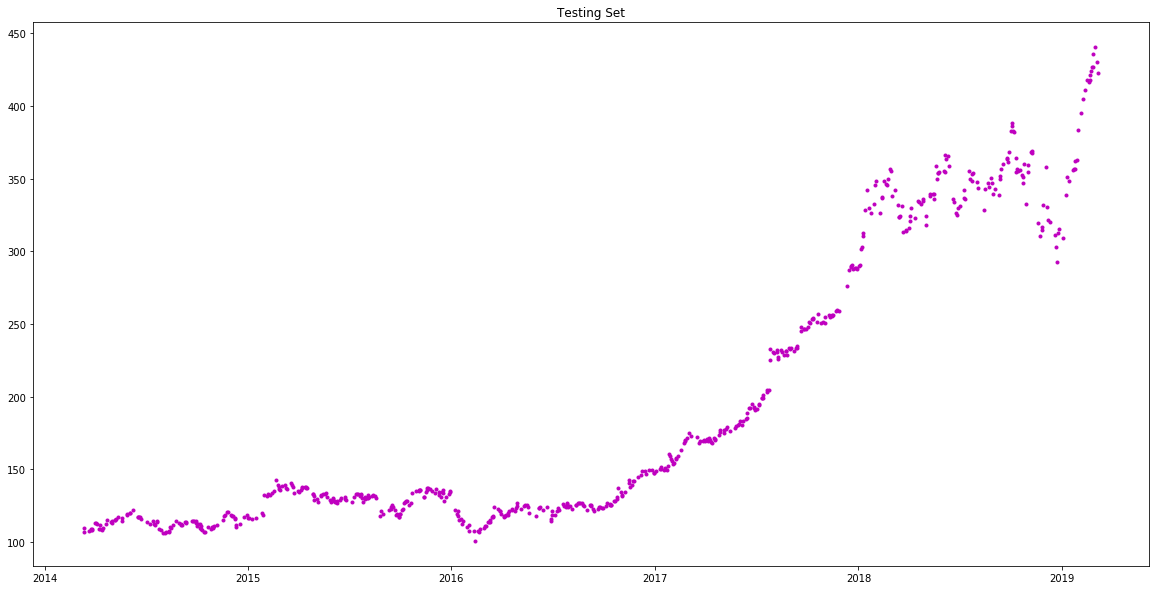

In [8]:
plt.figure(figsize=(20,10))
plt.plot(X_test, Y_test, 'mo', markersize=3)
plt.title('Testing Set')

In [9]:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 10)

X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

/home/milo/.local/share/virtualenvs/data_analysis-1ek1L9II/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: The fit may be poorly conditioned
  """


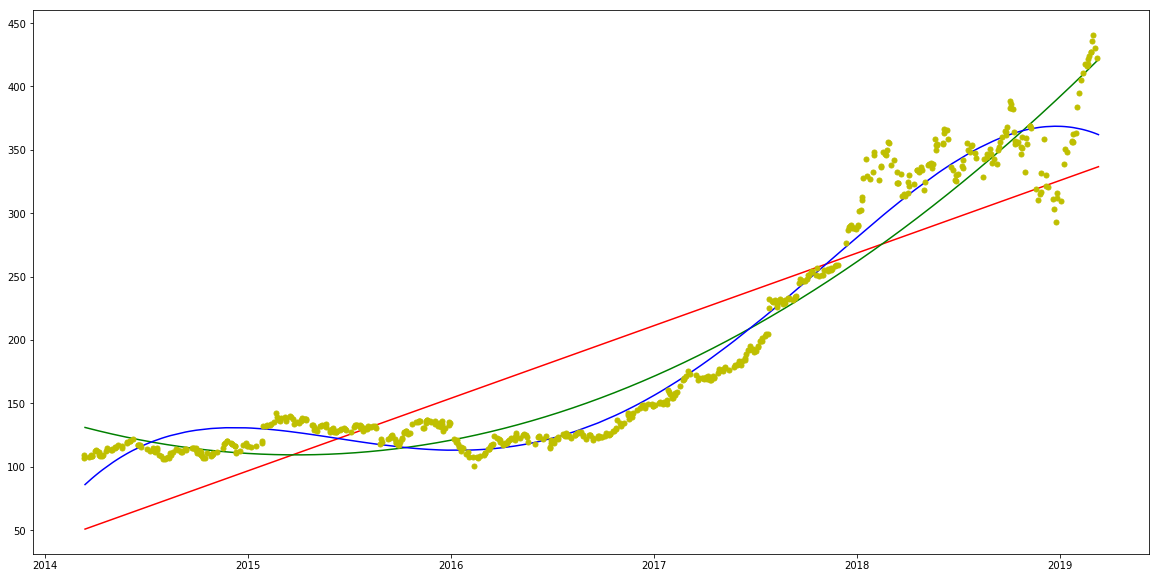

In [10]:
plt.figure(figsize=(20,10))
#plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_ln, 'r')
plt.plot(X_line, ffit_sq, 'g')
plt.plot(X_line, ffit_ten, 'b')

plt.plot(X_test, Y_test, 'yo', markersize=5)

### Conclusions:

I don't know a ton about economics, and I know even less about the stock market. However, I'm reminded of John Maynard Keynes' "beauty contest" metaphor. I will outsource to <a href="https://en.wikipedia.org/wiki/Keynesian_beauty_contest">Wikipedia's</a> well-crafted summary:

"Keynes described the action of rational agents in a market using an analogy based on a fictional newspaper contest, in which entrants are asked to choose the six most attractive faces from a hundred photographs. Those who picked the most popular faces are then eligible for a prize.

"A naive strategy would be to choose the face that, in the opinion of the entrant, is the most handsome. A more sophisticated contest entrant, wishing to maximize the chances of winning a prize, would think about what the majority perception of attractive is, and then make a selection based on some inference from his knowledge of public perceptions. This can be carried one step further to take into account the fact that other entrants would each have their own opinion of what public perceptions are. Thus the strategy can be extended to the next order and the next and so on, at each level attempting to predict the eventual outcome of the process based on the reasoning of other rational agents.

"'It is not a case of choosing those \[faces\] that, to the best of one's judgment, are really the prettiest, nor even those that average opinion genuinely thinks the prettiest. We have reached the third degree where we devote our intelligences to anticipating what average opinion expects the average opinion to be. And there are some, I believe, who practice the fourth, fifth and higher degrees.' (Keynes, General Theory of Employment, Interest and Money, 1936)."

The point being, a stock price is a number that represents extraordinary real-world complexity. Because the price on any given day is given to us as a simple floating point number, we can imagine that we know what it means; that that number contains information; that it tells us something about the world. I'd argue nothing could be further from the truth.

I'm also reminded of the 2008 recession, and the collapse of mortgage-backed securities that preceded it. Subsequent reporting has revealed that there were plenty of people who knew that the MBS were ticking bombs. Those people tried to warn others, but they were not believed because what they were saying ran against the widely-shared assumptions of the time. 

As we're playing around with finding the "best fit" of the regression to the data, using our own inadequate judgement as the sole yardstick, I wonder if there's a hard limit on what we humans can hope to learn from a machine learning algorithm. If an AI tells us about something outside our knowledge or experience, will we believe it? Or will we assume it's malfunctioning and adjust it to be more in line with our own knowledge & judgement? As Ludwig Wittgenstein put it, "If a lion could speak, we could not understand him."

Anyway, with all that said it's a fun mental excercise to try to "fit" the various regressions into what we know about Boeing's recent troubles with the 737 Max 8 crashes. Their stock price is plummeting, of course, but in the 5-year data it's barely a blip at the end. You'd think switching to a 1-year data window would make the regressions more responsive to the dip at the end, but it doesn't. 

It's actually the 5-year window that produces a line that fits with what we think we know about Boeing's present and immediate future: The blue 10-degree polynomial ignores the early 2019 jump and points gradually downward. Is that because, with more data, it's better able to model Boeing's success factors? No, of course not, but it's easy to see how people could fool themselves into thinking that. 